# Лабораторная работа № 4.4.1
# "Амплитудная дифракционная решётка"
## Выполнили: 
- Самойленко Александр 778 гр.
- Усеинов Булат 778 гр.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate
import math
from IPython.core.display import Image, display

$\textbf{Цель работы:}$ Знакомство с работой и настройкой гониометра $Г_5$, определение спектральных характеристик амплитудной решётки.


$\textbf{В работе используются:}$ гониометр, дифракционная решётка, ртутная лампа.

## $\textbf{Ход работы:}$

#### 1) Юстировка гониометра

#### 2) Установка решетки


Основание оправы решётки и её штрихи могут быть не перпендикулярны друг другу, поэтому плоскость столика следует немного наклонить. Установим решётку на столик так, чтобы её плоскость была перпендикулярна оси зрительной трубы и параллельна одному из установочных винтов. В центре поля зрения расположена белая ахроматическая полоса (спектр нулевого порядка). Высота полос должна быть менее четверти поля зрения трубы. Поворачивая алидаду, найдем изображение линий максимального порядка, и винтом 8, параллельным плоскости решётки, вернем центр изображения щели к горизонтальной оси отсчётного креста зрительной трубы.

#### 3) Исследование спектра ртутной лампы

Подберем ширину входной щели коллиматора так, чтобы ширина линий жёлтого дублета была чуть больше промежутка между линиями двойного штриха окуляра зрительной трубы. Установим высоту щели, удобную для измерений.

Измерим угловые координаты спектральных линий ртути в ±1 порядке:

In [94]:
phis_r = pd.DataFrame(columns=['Color', 'Deg', 'Min', 'Sec', 'lambda','Rad', 'sin'])
phis_r['Color'] = ['фиолетовый', 'синий', 'голубой', 'зеленый', 'желтый 2', 'желтый 1', 'красный 2', 'красный 1']
phis_r['Deg'] = [11, 12, 14, 15, 16, 16, 17, 18]
phis_r['Min'] = [38, 32, 10, 47, 42, 45, 45, 5]
phis_r['Sec'] = [9, 54, 36, 3, 4, 49, 27, 21]
phis_r['lambda'] = [404.7, 435.8, 491.6, 546.1, 577.0, 579.1, 623.4, 690.7]
phis_r['Rad'] = (np.pi/180)*(phis_r['Deg'] + (phis_r['Min']/60) + (phis_r['Sec']/3600))
phis_r['sin'] = np.sin(phis_r['Rad'])

phis_r

,Color,Deg,Min,Sec,lambda,Rad,sin
0,фиолетовый,11,38,9,404.7,0.203084,0.201691
1,синий,12,32,54,435.8,0.219010,0.217263
2,голубой,14,10,36,491.6,0.247430,0.244913
3,зеленый,15,47,3,546.1,0.275486,0.272014
4,желтый 2,16,42,4,577.0,0.291489,0.287379
5,желтый 1,16,45,49,579.1,0.292580,0.288424
6,красный 2,17,45,27,623.4,0.309927,0.304989
7,красный 1,18,5,21,690.7,0.315716,0.310497


In [95]:
phis_l = pd.DataFrame(columns=['Color', 'Deg', 'Min', 'Sec', 'lambda', 'Rad', 'sin'])
phis_l['Color'] = ['фиолетовый', 'синий', 'голубой', 'зеленый', 'желтый 2', 'желтый 1', 'красный 2', 'красный 1']
phis_l['Deg'] = [11, 12, 14, 15, 16, 16, 17, 18]
phis_l['Min'] = [42, 37, 42, 54, 49, 53, 53, 14]
phis_l['Sec'] = [33, 42, 52, 20, 57, 29, 51, 0]
phis_l['lambda'] = [404.7, 435.8, 491.6, 546.1, 577.0, 579.1, 623.4, 690.7]
phis_l['Rad'] = (np.pi/180)*(phis_l['Deg'] + (phis_l['Min']/60) + (phis_l['Sec']/3600))
phis_l['sin'] = np.sin(phis_l['Rad'])

phis_l

,Color,Deg,Min,Sec,lambda,Rad,sin
0,фиолетовый,11,42,33,404.7,0.204364,0.202944
1,синий,12,37,42,435.8,0.220406,0.218626
2,голубой,14,42,52,491.6,0.256816,0.254002
3,зеленый,15,54,20,546.1,0.277604,0.274052
4,желтый 2,16,49,57,577.0,0.293783,0.289575
5,желтый 1,16,53,29,579.1,0.294810,0.290558
6,красный 2,17,53,51,623.4,0.312370,0.307315
7,красный 1,18,14,0,690.7,0.318232,0.312888


In [96]:
yellow = pd.DataFrame()
yellow['rang'] = [1,2,-1,-2]
yellow['Deg1'] = [16, 35, 16, 35]
yellow['Min1'] = [45, 3, 53, 33]
yellow['Sec1'] = [49, 37, 29, 45]
yellow['Deg2'] = [16, 34,  16, 35] 
yellow['Min2'] = [42, 51,  49, 21]
yellow['Sec2'] = [4, 12,  57, 36]
yellow['dphi'] = (yellow['Deg1']*3600 + (yellow['Min1']*60) + yellow['Sec1']) - (yellow['Deg2']*3600 + (yellow['Min2']*60) + yellow['Sec2'])
yellow['dlambda'] = [21]*4
yellow['D'] = yellow['dphi'] / yellow['dlambda'] 
yellow

,rang,Deg1,Min1,Sec1,Deg2,Min2,Sec2,dphi,dlambda,D
0,1,16,45,49,16,42,4,225,21,10.714286
1,2,35,3,37,34,51,12,745,21,35.476190
2,-1,16,53,29,16,49,57,212,21,10.095238
3,-2,35,33,45,35,21,36,729,21,34.714286


In [97]:
#Ширина желтой линии спектра
x = 46 # сек

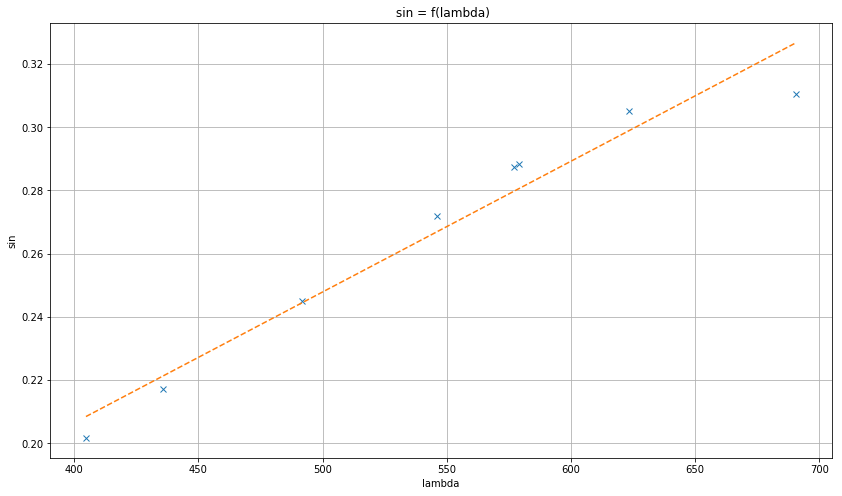

In [98]:
plt.figure(figsize=(14,8))
plt.title(r' sin = f(lambda)')
plt.plot(phis_r['lambda'], phis_r['sin'], 'x' )
A = np.vstack([phis_r['lambda'], np.ones(len(phis_r['lambda']))]).T
b, a = np.linalg.lstsq(A, phis_r['sin'], rcond = None)[0]
plt.plot(phis_r['lambda'], b*phis_r['lambda'] + a, '--')
plt.grid()
plt.xlabel(r'lambda')
plt.ylabel(r'sin');

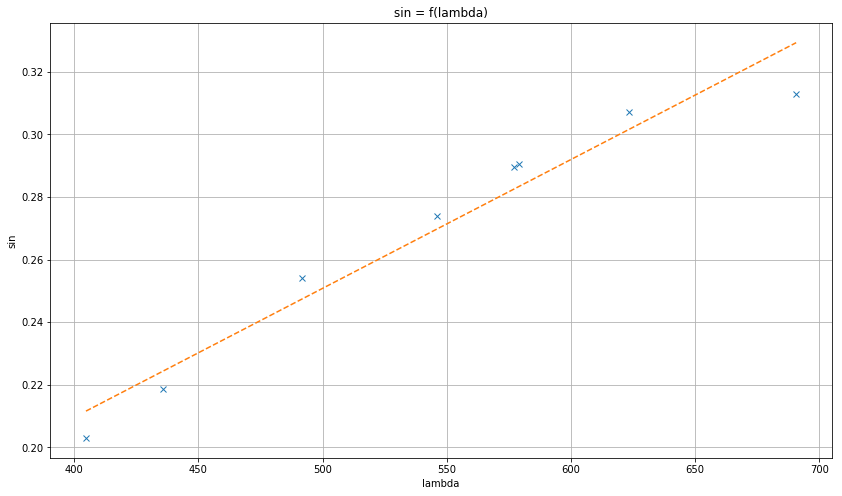

In [99]:
plt.figure(figsize=(14,8))
plt.title(r' sin = f(lambda) ')
plt.plot(phis_l['lambda'], phis_l['sin'], 'x' )
A = np.vstack([phis_l['lambda'], np.ones(len(phis_l['lambda']))]).T
bl, al = np.linalg.lstsq(A, phis_l['sin'], rcond = None)[0]
plt.plot(phis_l['lambda'], bl*phis_l['lambda'] + al, '--')
plt.grid()
plt.xlabel(r'lambda')
plt.ylabel(r'sin');

In [100]:
#период диф решетки
d = (1/b+1/bl)/2
print("d = %0.f±130 nm" % (d))

d = 2423±130 nm


In [101]:
D = 10.71
delta_lambda = x/D

In [102]:
print('delta_lambda = 4.3 A')
print('R = lambda/delta_lambda = ', int(round(5770/4.3, -2)))

delta_lambda = 4.3 A
R = lambda/delta_lambda =  1300
